In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf

# Загружаем данные из Excel-файла
data = pd.read_excel('C:/Users/mtaig/Desktop/ds_lact_2.xlsx')
# Просмотр первых нескольких строк данных
print(data.head())

# Определяем признаки (X) и целевую переменную (y)
X = data[['Milk yield 305, kg - 1 Lac.', 'Fat  305, % - 1 lac.',  'Protein  305, % - 1 lac.','Live weightа - 1 lac.']]
y = data['Milk yield for the entire lactation, kg - 1 lac.']

   Milk yield 305, kg - 1 Lac.  Fat  305, % - 1 lac.  \
0                         7261                  3.63   
1                         7167                  3.83   
2                        10295                  3.55   
3                        10010                  3.66   
4                         8942                  3.62   

   Protein  305, % - 1 lac.  Live weightа - 1 lac.  \
0                      3.14                    584   
1                      3.46                    540   
2                      3.13                    640   
3                      3.22                    530   
4                      3.18                    620   

   Milk yield for the entire lactation, kg - 1 lac.  
0                                              7261  
1                                              7396  
2                                             16412  
3                                             14937  
4                                              8942  


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создаем модель TensorFlow/Keras
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Первый скрытый слой
    Dense(32, activation='relu'),  # Второй скрытый слой
    Dense(1)  # Выходной слой (регрессия)
])

# Компиляция модели
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Обучение модели
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Делаем прогнозы на тестовой выборке
y_pred = model.predict(X_test_scaled).flatten()

# Оцениваем качество модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Выводим метрики качества
print(f"Среднеквадратическая ошибка (MSE): {mse:.4f}")
print(f"Коэффициент детерминации (R²): {r2:.4f}")

c:\Users\mtaig\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Среднеквадратическая ошибка (MSE): 26510278.0000
Коэффициент детерминации (R²): -4.1440


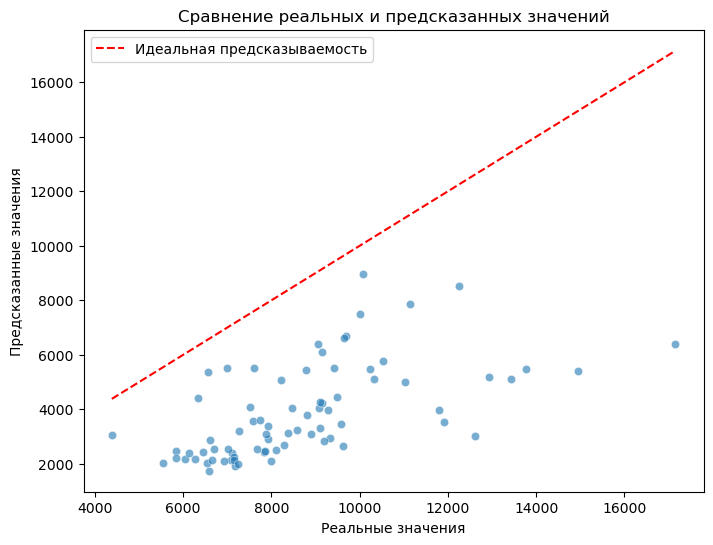

In [3]:
# График рассеяния для сравнения реальных и предсказанных значений
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Идеальная предсказываемость')
plt.title('Сравнение реальных и предсказанных значений')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.show()

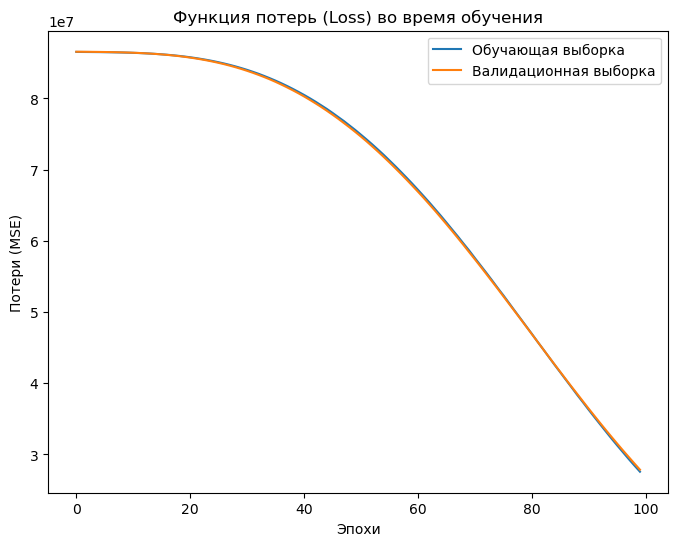

In [4]:
# График функции потерь во время обучения
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Обучающая выборка')
plt.plot(history.history['val_loss'], label='Валидационная выборка')
plt.title('Функция потерь (Loss) во время обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потери (MSE)')
plt.legend()
plt.show()

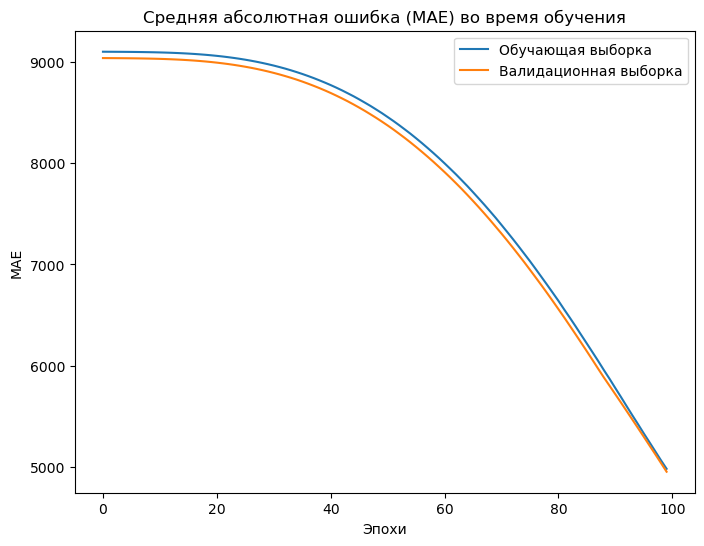

In [5]:
# График средней абсолютной ошибки (MAE) во время обучения
plt.figure(figsize=(8, 6))
plt.plot(history.history['mae'], label='Обучающая выборка')
plt.plot(history.history['val_mae'], label='Валидационная выборка')
plt.title('Средняя абсолютная ошибка (MAE) во время обучения')
plt.xlabel('Эпохи')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [6]:
# Прогнозирование
predictions = model.predict(X_test)

# Печать первых 5 прогнозов и реальных значений
for i in range(5):
    print(f"Predicted: {predictions[i][0]:.2f}, Actual: {y_test.iloc[i]}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Predicted: 15160405.00, Actual: 7590
Predicted: 15541954.00, Actual: 7833
Predicted: 23461712.00, Actual: 12253
Predicted: 15229043.00, Actual: 7910
Predicted: 17769872.00, Actual: 9287


In [2]:
import matplotlib.pyplot as plt

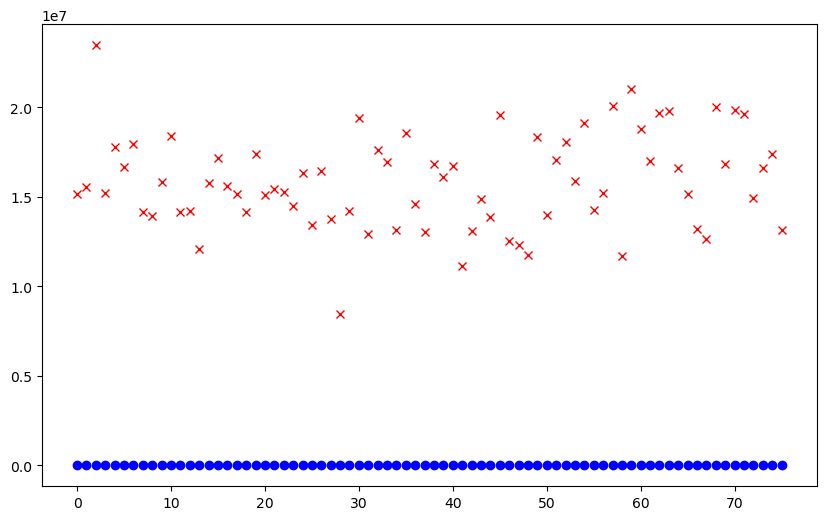

In [8]:
# Преобразование predictions в одномерный массив
predictions = predictions.flatten()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', marker='o', linestyle='', color='blue')
plt.plot(predictions, label='Predicted Values', marker='x', linestyle='', color='red')


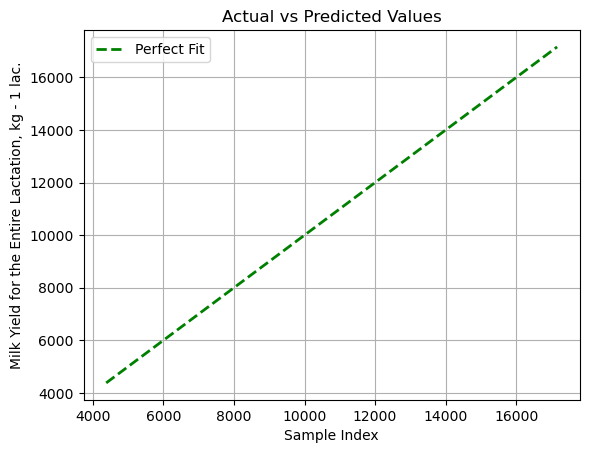

In [9]:

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--', linewidth=2, label='Perfect Fit')

# Настройка графика
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Milk Yield for the Entire Lactation, kg - 1 lac.')
plt.legend()
plt.grid(True)
plt.show()